In [1]:
import asyncio
import sys
sys.path.append('/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent')
from experiments.utilities.evaluation import AgentEvaluator
from experiments.utilities.multi_run_evaluator import MultiRunEvaluator

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sebastian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Check the following things before running an experiment###

1. What LLMs are used for which component?
2. Temperature set correctly?
3. Max tokens set correctly?
4. Any extra specific parameters set correctly?
5. Correct prompt set?
6. Docker running?
7. Experiment path set?
8. Restart kernel to overtake all changes.
9. Graph node set correctly?
10. Correct test set?
11. Correct project name in .env file?

In [2]:
# test_set = {
#     "SwissLipids": ["5.ttl", "34.ttl"],
#     "Uniprot": ["51_all_proteins_linked_to_arachidonate.ttl", "40_human_enzymes_that_metabolize_sphingolipids"],
#     "Rhea": ["12.ttl", "112_Total_number_of_reaction_ec_protein_links.ttl", "117_Retrieve_parent_reactions_and_their_catalyzing_enzymes_for_a_metabolite_that_is_not_directly_involved_in_a_reaction.ttl"]
# }

test_set = { "SwissLipids": [], "Uniprot": [], "Rhea": [] }

In [ ]:
# test_set = {
#     "SwissLipids": [
#         "16.ttl",
#         "34.ttl",
#         "6.ttl"
#     ],
#     "Uniprot": [
#         "116_biosodafrontend_rabit_mouse_orthologs.ttl",
#         "117_biosodafrontend_glioblastoma_orthologs_rat.ttl",
#         "118_biosodafrontend_rat_brain_human_cancer.ttl",
#         "29_search_uniprot_in_japanese_with_allie.ttl",
#         "36_orthologous_proteins_via_orthodb.ttl",
#         "38_find_gene_region_in_wikidata_for_known_entry.ttl",
#         "42_connect_patents_to_epo.ttl",
#         "43_patents_used_in_uniprot_granted_twenty_years_in_the_past.ttl",
#         "45_drugs_targeting_human_sterol_metabolism_enzymes.ttl",
#         "49_tissues_where_genes_metabolizing_cholestrol_are_expressed.ttl",
#         "51_all_proteins_linked_to_arachidonate.ttl",
#         "52_drugs_targeting_sterol_metabolism.ttl",
#         "53_mouse_homologs_of_sterol_enzymes_via_omabrowser.ttl",
#         "54_binding_sites_for_ligands_similar_to_heme_sachem.ttl",
#         "60_enzymes_working_on_substrate_with_Cholestene_backbone.ttl",
#         "67_draft_human_metabolome.ttl",
#         "70_enzymes_interacting_with_molecules_similar_to_dopamine.ttl"
#     ],
#     "Rhea": [
#         "109_Distribution_of_reactions_according_to_the_first_level_of_enzyme_classification.ttl",
#         "11.ttl",
#         "112_Total_number_of_reaction_ec_protein_links.ttl",
#         "115_Retrieve_the_set_of_metabolites_involved_in_reactions_catalyzed_by_human_genes_HUMAN_reference_proteome.ttl",
#         "117_Retrieve_parent_reactions_and_their_catalyzing_enzymes_for_a_metabolite_that_is_not_directly_involved_in_a_reaction.ttl",
#         "12.ttl",
#         "18.ttl",
#         "19_draft_human_metabolome.ttl",
#         "20_search_chemical_names_in_japanese.ttl"
#     ]
# }

In [ ]:
# #List to test last prompting methodology.

# endpoint_set = {
#     "Rhea": [
#         "109_Distribution_of_reactions_according_to_the_first_level_of_enzyme_classification.ttl",
#         "11.ttl",
#         "112_Total_number_of_reaction_ec_protein_links.ttl",
#         "115_Retrieve_the_set_of_metabolites_involved_in_reactions_catalyzed_by_human_genes_HUMAN_reference_proteome.ttl",
#         "117_Retrieve_parent_reactions_and_their_catalyzing_enzymes_for_a_metabolite_that_is_not_directly_involved_in_a_reaction.ttl",
#         "12.ttl",
#         "18.ttl",
#         "20_search_chemical_names_in_japanese.ttl",
#         "94_Select_all_approved_reactions_with_CHEBI_or_one_of_its_descendant_optional_UniProtKB_reviewed_EC.ttl"
#     ],
#     "SwissLipids": [
#         "16.ttl",
#         "34.ttl",
#         "5.ttl",
#         "6.ttl"
#     ],
#     "UniProt": [
#         "116_biosodafrontend_rabit_mouse_orthologs.ttl",
#         "117_biosodafrontend_glioblastoma_orthologs_rat.ttl",
#         "118_biosodafrontend_rat_brain_human_cancer.ttl",
#         "29_search_uniprot_in_japanese_with_allie.ttl",
#         "36_orthologous_proteins_via_orthodb.ttl",
#         "38_find_gene_region_in_wikidata_for_known_entry.ttl",
#         "40_human_enzymes_that_metabolize_sphingolipids.ttl",
#         "42_connect_patents_to_epo.ttl",
#         "43_patents_used_in_uniprot_granted_twenty_years_in_the_past.ttl",
#         "45_drugs_targeting_human_sterol_metabolism_enzymes.ttl",
#         "49_tissues_where_genes_metabolizing_cholestrol_are_expressed.ttl",
#         "51_all_proteins_linked_to_arachidonate.ttl",
#         "52_drugs_targeting_sterol_metabolism.ttl",
#         "53_mouse_homologs_of_sterol_enzymes_via_omabrowser.ttl",
#         "54_binding_sites_for_ligands_similar_to_heme_sachem.ttl",
#         "60_enzymes_working_on_substrate_with_Cholestene_backbone.ttl",
#         "67_draft_human_metabolome.ttl",
#         "70_enzymes_interacting_with_molecules_similar_to_dopamine.ttl"
#     ],
# }

In [3]:

evaluator = AgentEvaluator(
    endpoint_sets=test_set,
    experiment_dir="experiments_official",
    project_name_langsmith="baseline_v1.0_gemini-2.0-flash",
    timeout = 300,
    tracked_token_nodes= ["question_understanding", "sparql_query_construction"],
    dataset_dir="/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/federated_sparql_dataset/examples_federated_19.04.2025"

)
evaluation_dataset_path = await evaluator.run_all_tests()

Processing endpoint set: SwissLipids
Processed: 16.ttl
Processed: 6.ttl
Processed: 5.ttl
Processed: 34.ttl
Processed 4 files from SwissLipids
Processing endpoint set: Uniprot
Processed: 118_biosodafrontend_rat_brain_human_cancer.ttl
Processed: 51_all_proteins_linked_to_arachidonate.ttl
Processed: 40_human_enzymes_that_metabolize_sphingolipids.ttl
Processed: 49_tissues_where_genes_metabolizing_cholestrol_are_expressed.ttl
Processed: 53_mouse_homologs_of_sterol_enzymes_via_omabrowser.ttl
Processed: 52_drugs_targeting_sterol_metabolism.ttl
Processed: 54_binding_sites_for_ligands_similar_to_heme_sachem.ttl
Processed: 43_patents_used_in_uniprot_granted_twenty_years_in_the_past.ttl
Processed: 45_drugs_targeting_human_sterol_metabolism_enzymes.ttl
Processed: 42_connect_patents_to_epo.ttl
Processed: 67_draft_human_metabolome.ttl
Processed: 36_orthologous_proteins_via_orthodb.ttl
Processed: 60_enzymes_working_on_substrate_with_Cholestene_backbone.ttl
Processed: 70_enzymes_interacting_with_molec

/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/.venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


SP-BLEU 0.01657831424235994
METEOR 0.19032699825749444
F1-score:  0
SP-F1-score:  0
Number of invalid queries(None): 0
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-05-08_18-12-10/16_comparison.ttl
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-05-08_18-12-10/6_comparison.ttl
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-05-08_18-12-10/5_comparison.ttl
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-05-08_18-12-10/34_comparison.ttl
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-05-08_18-12-10/118_biosoda

/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/.venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [4]:
evaluator = MultiRunEvaluator(
    num_runs=3,
    endpoint_sets=test_set,
    experiment_dir="experiments_official",
    project_name_langsmith="cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1",
    timeout=600,
    tracked_token_nodes=["question_understanding", "sparql_query_construction"],
    dataset_dir="/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/federated_sparql_dataset/examples_federated_19.04.2025"
)

# Use await directly with the async method
evaluation_dataset_path = await evaluator.run_experiments_async()

Starting 3 evaluation runs...
Running experiment 1/3
Processing endpoint set: SwissLipids
Processed: 16.ttl
Processed: 6.ttl
Processed: 34.ttl
Processed 3 files from SwissLipids
Processing endpoint set: Uniprot
Processed: 118_biosodafrontend_rat_brain_human_cancer.ttl
Processed: 51_all_proteins_linked_to_arachidonate.ttl
Processed: 49_tissues_where_genes_metabolizing_cholestrol_are_expressed.ttl
Processed: 53_mouse_homologs_of_sterol_enzymes_via_omabrowser.ttl
Processed: 52_drugs_targeting_sterol_metabolism.ttl
Processed: 54_binding_sites_for_ligands_similar_to_heme_sachem.ttl
Processed: 43_patents_used_in_uniprot_granted_twenty_years_in_the_past.ttl
Processed: 45_drugs_targeting_human_sterol_metabolism_enzymes.ttl
Processed: 42_connect_patents_to_epo.ttl
Processed: 67_draft_human_metabolome.ttl
Processed: 36_orthologous_proteins_via_orthodb.ttl
Processed: 60_enzymes_working_on_substrate_with_Cholestene_backbone.ttl
Processed: 70_enzymes_interacting_with_molecules_similar_to_dopamine.t

I0000 00:00:1746428276.958927 1025141 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


Got result for question 1/29
Querying ground truth endpoint...
  Using cached result for query
Querying predicted endpoint...
Processing item: SwissLipids/6.ttl
Sending question 2/29 to agent...
Got result for question 2/29
Querying ground truth endpoint...
  Using cached result for query
Querying predicted endpoint...
[calculate_column_metrics_with_label_similarity] Calculating metrics for file: SwissLipids/6.ttl
exact pairs: 2
remaining gt: 5
startId -> proteinName (similarity: 0.5941300988197327)
startId -> protein (similarity: 0.5303880572319031)
startName -> proteinName (similarity: 0.6907681822776794)
startName -> protein (similarity: 0.5022683143615723)
chebi -> protein (similarity: 0.576590895652771)
chebi -> proteinName (similarity: 0.5346953868865967)
uniprot -> proteinName (similarity: 0.6574251055717468)
uniprot -> protein (similarity: 0.6434313058853149)
uniprotName -> proteinName (similarity: 0.6760596036911011)
uniprotName -> protein (similarity: 0.5307281017303467)
gt_t

/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/.venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/.venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


None query found
SP-BLEU 0.10720406370072454
METEOR 0.2916383272474737
F1-score:  0
SP-F1-score:  0
Number of invalid queries(None): 1
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-05_08-57-54/run_1/ev_2025-05-05_08-57-54/16_comparison.ttl
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-05_08-57-54/run_1/ev_2025-05-05_08-57-54/6_comparison.ttl
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-05_08-57-54/run_1/ev_2025-05-05_08-57-54/34_comparison.ttl
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-05_08-57-54/run_1/ev_2025-05-05_08-57-54/118_biosodafrontend_rat_brai

/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/.venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/.venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


None query found
SP-BLEU 0.08555380277341751
METEOR 0.27968800471317534
F1-score:  0
SP-F1-score:  0
Number of invalid queries(None): 1
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-05_08-57-54/run_2/ev_2025-05-05_09-54-16/16_comparison.ttl
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-05_08-57-54/run_2/ev_2025-05-05_09-54-16/6_comparison.ttl
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-05_08-57-54/run_2/ev_2025-05-05_09-54-16/34_comparison.ttl
Saved query comparison to: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-05_08-57-54/run_2/ev_2025-05-05_09-54-16/118_biosodafrontend_rat_bra

/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/.venv/lib/python3.11/site-packages/SPARQLWrapper/Wrapper.py:1215: RuntimeWarning: unknown response content type 'text/html' returning raw response...
  warnings.warn(
Traceback (most recent call last):
  File "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/utilities/evaluation.py", line 242, in run_all_tests
    df_ground_truth, df_predicted = format_query_result_dataframe(
                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/utilities/result_metric.py", line 46, in format_query_result_dataframe
    columns = predicted["head"]["vars"]
              ~~~~~~~~~^^^^^^^^
TypeError: byte indices must be integers or slices, not str


Error processing question 28/29: byte indices must be integers or slices, not str
file_path: Rhea/18.ttl
Offending item: {'resource': 'https://sparql.rhea-db.org/.well-known/sparql-examples/18', 'natural_language_question': 'Use <a href="https://idsm.elixir-czech.cz/sparql">IDSM Sachem</a> to find ChEBIs with a a <a href="https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:35516">Cholestane</a> skeleton (in SMILES). Then match returned ChEBIs to Rhea undirected reactions.', 'query': 'PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\nPREFIX rh: <http://rdf.rhea-db.org/>\nPREFIX sachem: <http://bioinfo.uochb.cas.cz/rdf/v1.0/sachem#>\n\n\nSELECT \n  ?rhea \n  ?chebi\nWHERE {\n  SERVICE <https://idsm.elixir-czech.cz/sparql/endpoint/chebi> {\n    ?chebi sachem:substructureSearch [\n        sachem:query "[C@]12(CCC3CCCC[C@]3(C)[C@@]1([H])CC[C@]1(C)[C@@]([H])([C@@](C)([H])CCCC(C)C)CC[C@@]21[H])[H]" ].\n  }\n  ?rhea rh:side/rh:contains/rh:compound/rdfs:subClassOf ?chebi .\n}', 'target_en

/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/.venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/.venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [1]:

import sys
import os
project_root = '/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent'
sys.path.append(project_root)

from experiments.utilities.multi_run_evaluator import calculate_statistics_for_existing_runs

multi_run_path = os.path.join(project_root, "experiments/experiments_official/multi_run_2025-05-06_22-14-46")

statistics = calculate_statistics_for_existing_runs(multi_run_path)


Calculating statistics for: /Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-06_22-14-46
Found 10 run directories
Loaded metrics from run 1 (evaluation dir: ev_2025-05-18_21-44-38)
Loaded metrics from run 2 (evaluation dir: ev_2025-05-18_22-56-33)
Loaded metrics from run 3 (evaluation dir: ev_2025-05-18_23-56-40)
Loaded metrics from run 4 (evaluation dir: ev_2025-05-07_09-53-08)
Loaded metrics from run 5 (evaluation dir: ev_2025-05-07_12-36-21)
Loaded metrics from run 6 (evaluation dir: ev_2025-05-07_15-07-34)
Loaded metrics from run 7 (evaluation dir: ev_2025-05-07_20-45-31)
Loaded metrics from run 8 (evaluation dir: ev_2025-05-08_01-35-55)
Loaded metrics from run 9 (evaluation dir: ev_2025-05-07_23-21-58)
Loaded metrics from run 10 (evaluation dir: ev_2025-05-07_18-26-46)
Successfully processed 10 runs

Statistics Summary:
  Excluding Empty Result Precision: 0.4890 (95% CI: [0.4195, 0.5584], n=10, std=0.09

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sebastian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


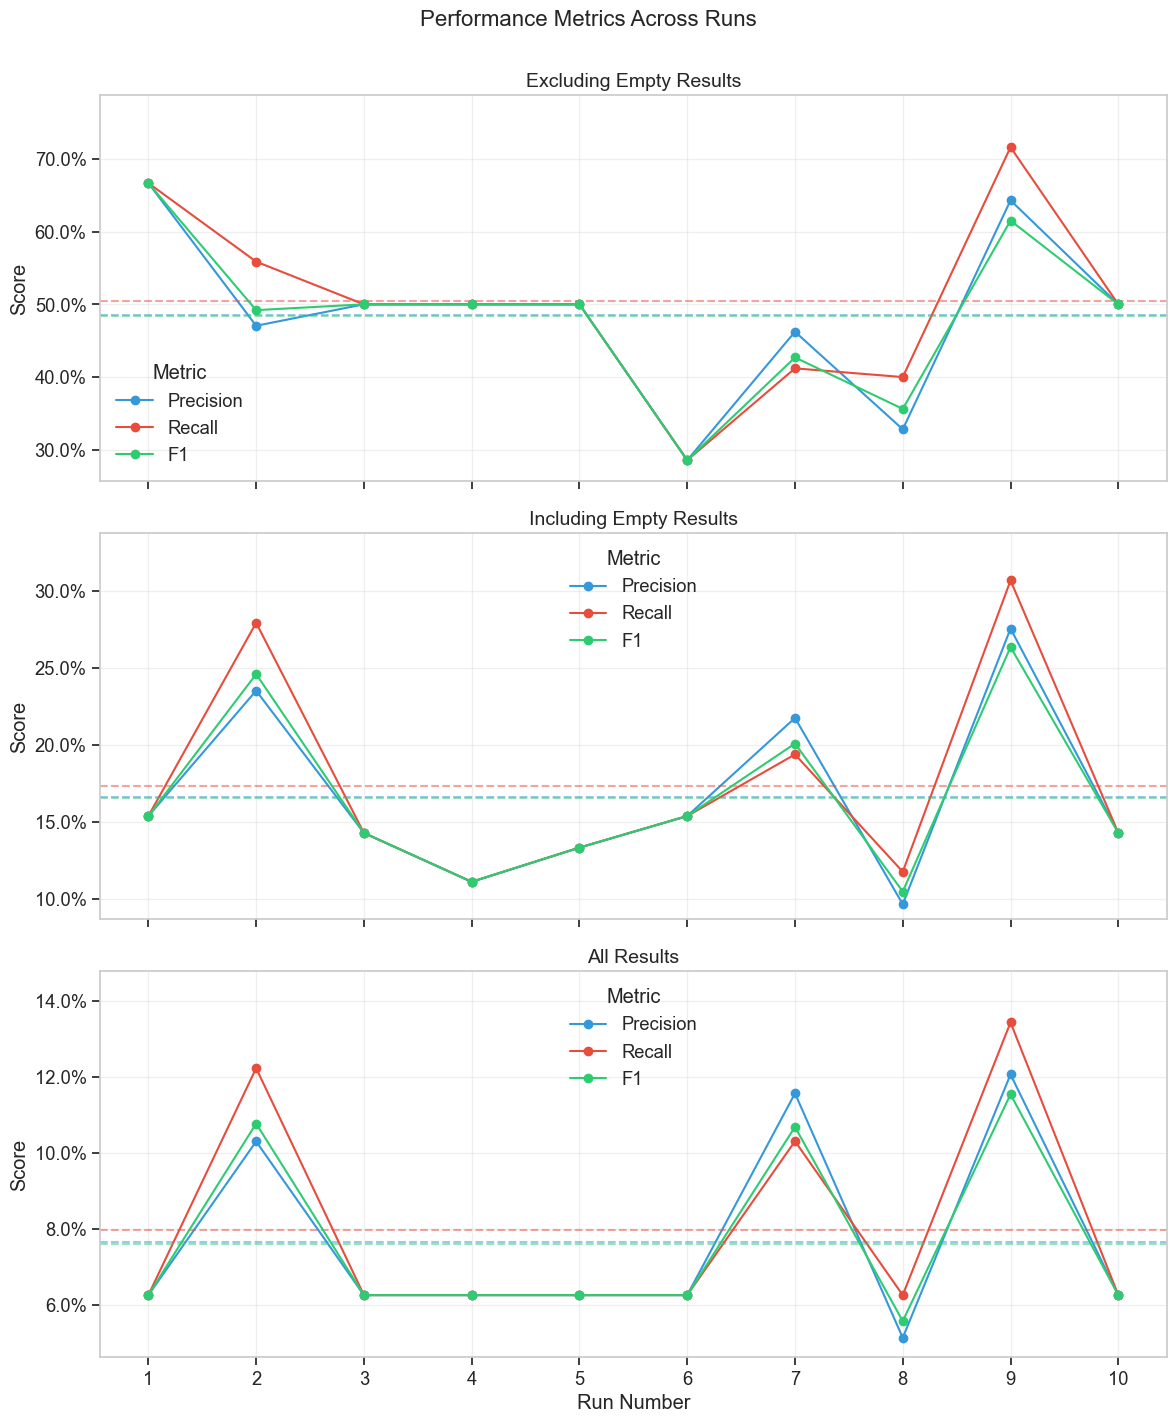

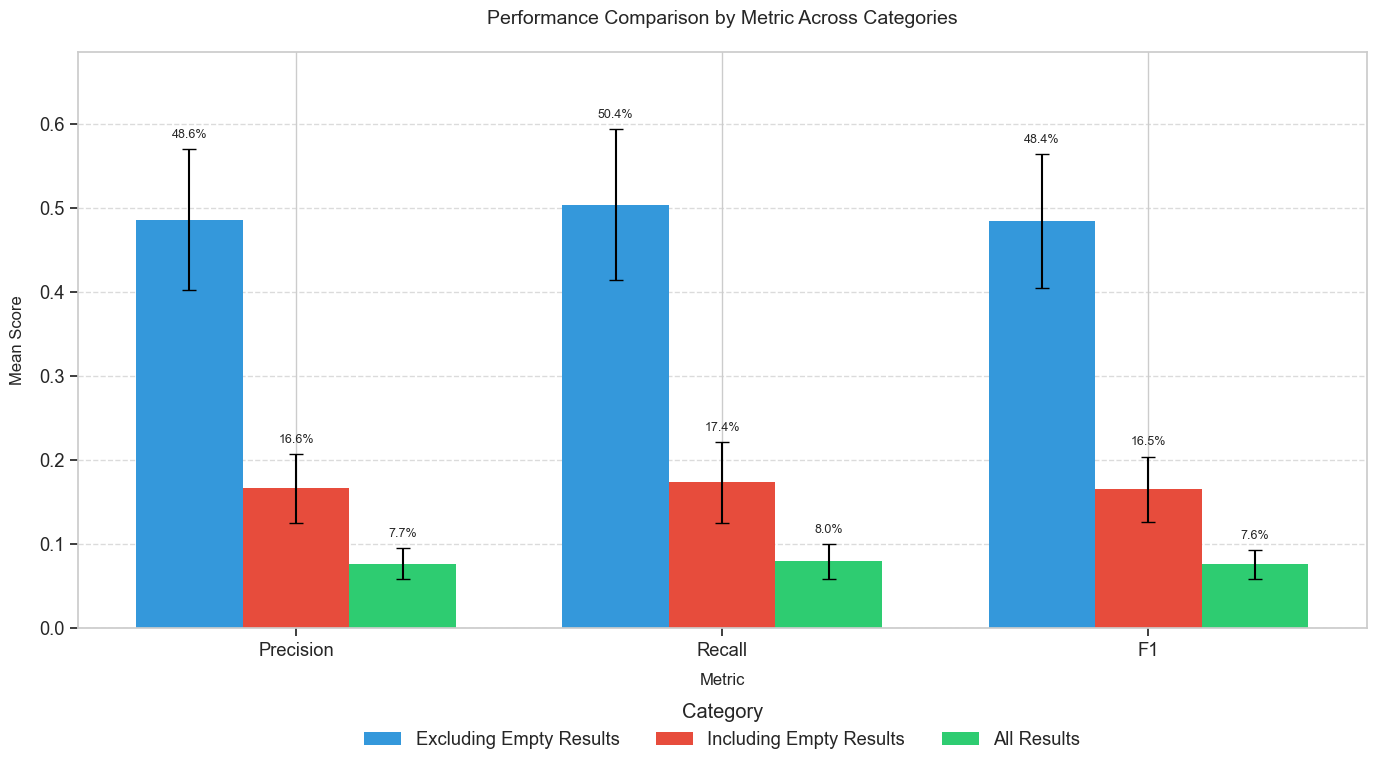

In [25]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Load the statistics
with open('/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/multi_run_2025-05-02_00-31-21/aggregate_statistics.json', 'r') as f:
    stats = json.load(f)

categories = {
    'Excluding Empty Results': 'avg_result_excluding_empty_result',
    'Including Empty Results': 'avg_result_including_empty_result', 
    'All Results': 'avg_result_all'
}

metrics = ['precision', 'recall', 'f1']
# Original colors (will be used for line plot)
metric_colors = {'Precision': '#3498db', 'Recall': '#e74c3c', 'F1': '#2ecc71'}

# --- Line Plot Code (Unchanged) ---
# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
fig.suptitle('Performance Metrics Across Runs', fontsize=16, y=0.95)

# Process each category
for ax_idx, (cat_name, cat_prefix) in enumerate(categories.items()):
    ax = axes[ax_idx]
    
    # Extract data for this category
    for metric in metrics:
        key = f"{cat_prefix}_{metric}"
        if key in stats:
            values = stats[key]['values']
            runs = range(1, len(values) + 1)
            mean = stats[key]['mean']
            
            # Plot the values and mean line
            label = metric.capitalize()
            ax.plot(runs, values, marker='o', label=label, color=metric_colors[label])
            ax.axhline(y=mean, color=metric_colors[label], linestyle='--', alpha=0.5)
    
    # Configure the subplot
    ax.set_title(f'{cat_name}', fontsize=14)
    ax.set_ylabel('Score')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1%}'))
    ax.legend(title='Metric')
    ax.grid(True, alpha=0.3)
    
    # Determine appropriate y-axis limits from the data
    y_data = []
    for metric in metrics:
        key = f"{cat_prefix}_{metric}"
        if key in stats:
            y_data.extend(stats[key]['values'])
    
    if y_data:
        min_y = max(0, min(y_data) * 0.9)  # Give some bottom padding
        max_y = min(1.0, max(y_data) * 1.1)  # Ensure we don't exceed 100%, add top padding
        ax.set_ylim(min_y, max_y)
    
# Label the x-axis
axes[-1].set_xlabel('Run Number')
if stats:
    sample_key = next(iter(stats.keys()))
    if 'values' in stats[sample_key]:
        axes[-1].set_xticks(range(1, len(stats[sample_key]['values']) + 1))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Bar Plot Code (Modified as per request) ---
plt.figure(figsize=(14, 8))
bar_width = 0.25
metric_positions = np.arange(len(metrics))

# Define colors for categories
category_colors = {
    'Excluding Empty Results': '#3498db', 
    'Including Empty Results': '#e74c3c', 
    'All Results': '#2ecc71'
}

# Group by metric, with categories within each group
for idx, (cat_name, cat_prefix) in enumerate(categories.items()):
    values = []
    errors_minus = []
    errors_plus = []
    
    # Collect values for this category across all metrics
    for metric in metrics:
        key = f"{cat_prefix}_{metric}"
        if key in stats:
            values.append(stats[key]['mean'])
            errors_minus.append(stats[key]['mean'] - stats[key]['ci_lower'])
            errors_plus.append(stats[key]['ci_upper'] - stats[key]['mean'])
        else:
            values.append(0)
            errors_minus.append(0)
            errors_plus.append(0)
            
    # Calculate the position offset for this category
    # Ensure offset is calculated correctly to center the group of bars
    offset = (idx - (len(categories) - 1) / 2) * bar_width
    
    # Create bars for this category across all metrics
    bars = plt.bar(metric_positions + offset, values, bar_width,
                  label=cat_name,
                  color=category_colors[cat_name],
                  yerr=[errors_minus, errors_plus],
                  capsize=5)
    
    # Add value labels on each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + (errors_plus[i] if errors_plus else 0) + 0.01,
                    f'{height:.1%}', ha='center', va='bottom', fontsize=9)

# Set labels and title
plt.xlabel('Metric', fontsize=12, labelpad=10)
plt.ylabel('Mean Score', fontsize=12, labelpad=10)
plt.title('Performance Comparison by Metric Across Categories', fontsize=14, pad=20)
plt.xticks(metric_positions, [m.capitalize() for m in metrics])
plt.legend(title='Category', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(categories))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, plt.ylim()[1] * 1.1) # Adjust y-limit to make space for labels
plt.tight_layout()
plt.subplots_adjust(bottom=0.2) # Make space for legend below plot
plt.show()


In [7]:
df.head()

,Category,Metric,Value,CI Lower,CI Upper,yerr_minus,yerr_plus
0,Excluding Empty Results,Precision,0.485643,0.401717,0.569570,0.083926,0.083926
1,Excluding Empty Results,Recall,0.503907,0.414245,0.593568,0.089662,0.089662
2,Excluding Empty Results,F1,0.484273,0.404998,0.563548,0.079275,0.079275
3,Including Empty Results,Precision,0.166278,0.125161,0.207395,0.041117,0.041117
4,Including Empty Results,Recall,0.173558,0.125465,0.221651,0.048093,0.048093
